In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv("dataFromAllBooks.csv")
df.head()

,point 1,point 2,point 3,point 4,point 5,point 6,point 7,point 8,point 9,point 10,point 11,point 12,point 13,point 14,point 15,point 16,point 17
0,1,5,2,4,3,6,2,3,4,5,2,7,2,3,6,3,3
1,7,3,5,2,3,5,2,2,5,3,5,7,9,1,3,5,7
2,9,2,3,5,5,3,6,2,3,4,2,3,6,2,3,4,3
3,2,2,5,7,2,3,4,3,6,2,3,4,2,2,7,2,3
4,6,2,3,7,9,1,2,3,5,2,2,5,3,5,7,9,7


In [8]:
clusters = 3
kmeans = KMeans(n_clusters = clusters)
y_predicted = kmeans.fit_predict(df)
print(kmeans.labels_)
print(kmeans.inertia_)

[2 1 1 2 0 1 1 1 2]
332.40000000000003


In [21]:
df["cluster"] = y_predicted
df.head()

,point 1,point 2,point 3,point 4,point 5,point 6,point 7,point 8,point 9,point 10,point 11,point 12,point 13,point 14,point 15,point 16,point 17,cluster
0,1,5,2,4,3,6,2,3,4,5,2,7,2,3,6,3,3,2
1,7,3,5,2,3,5,2,2,5,3,5,7,9,1,3,5,7,1
2,9,2,3,5,5,3,6,2,3,4,2,3,6,2,3,4,3,1
3,2,2,5,7,2,3,4,3,6,2,3,4,2,2,7,2,3,2
4,6,2,3,7,9,1,2,3,5,2,2,5,3,5,7,9,7,0


In [22]:
k_range = range(1,9)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse

[549.7777777777777,
 424.83333333333326,
 336.0,
 248.75,
 162.66666666666669,
 102.0,
 56.5,
 23.0]

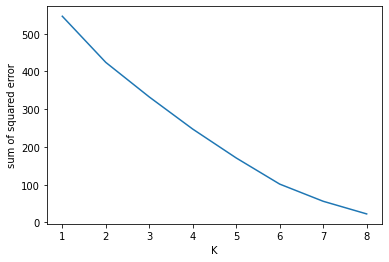

In [14]:
plt.xlabel("K")
plt.ylabel("sum of squared error")
plt.plot(k_range,sse)

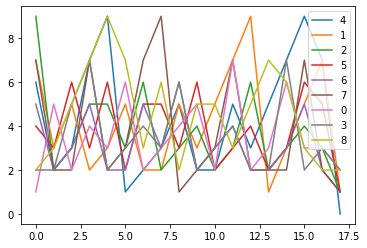

In [31]:

def transform(df):
    df = df.T
    df.reset_index(drop=True, inplace=True)
    return df

df0 = df[df.cluster.isin([0])]
df0 = transform(df0)
ax = df0.plot()


#TO DO: should actually only plot graphs in the same cluster 
#or, maybe there's a way to plot all graphs in a cluster into the same color

for i in range(1,clusters):
    df1 = df[df.cluster.isin([i])]
    df1 = transform(df1)
    df1.plot(ax=ax)
ax
